In [1]:
# @author Roshani Kharche

# enable inline plotting with matplotbib and seaborn
%matplotlib inline

import os 
import time
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
#import pydotplus 

#from IPython.display import Image  
#from collections import defaultdict
from sklearn import svm, tree
#from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2, SelectFromModel
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [2]:
### Import the dataset

colnames = ['existingchecking', 'duration', 'credithistory', 'purpose', 
            'creditamount', 'savings', 'employmentsince', 'installmentrate', 
            'statussex', 'otherdebtors', 'residencesince', 'property', 'age', 
            'otherinstallmentplans', 'housing', 'existingcredits', 'job',
            'peopleliable', 'telephone', 'foreignworker', 
            'Defaulter_NonDefaulter']

credit_card = pd.read_csv(r".\Data\german_credit.csv",delimiter=',',names=colnames)


print(credit_card.shape)
print(credit_card.columns)

(1000, 21)
Index(['existingchecking', 'duration', 'credithistory', 'purpose',
       'creditamount', 'savings', 'employmentsince', 'installmentrate',
       'statussex', 'otherdebtors', 'residencesince', 'property', 'age',
       'otherinstallmentplans', 'housing', 'existingcredits', 'job',
       'peopleliable', 'telephone', 'foreignworker', 'Defaulter_NonDefaulter'],
      dtype='object')


In [3]:
credit_card.head()

,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,...,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,Defaulter_NonDefaulter
0,A11,6,A34,A43,1169.0,A65,A75,4,A93,A101,...,A121,67.0,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951.0,A61,A73,2,A92,A101,...,A121,22.0,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096.0,A61,A74,2,A93,A101,...,A121,49.0,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882.0,A61,A74,2,A93,A103,...,A122,45.0,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870.0,A61,A73,3,A93,A101,...,A124,53.0,A143,A153,2,A173,2,A191,A201,2


In [4]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   existingchecking        1000 non-null   object 
 1   duration                1000 non-null   int64  
 2   credithistory           1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   creditamount            997 non-null    float64
 5   savings                 1000 non-null   object 
 6   employmentsince         998 non-null    object 
 7   installmentrate         1000 non-null   int64  
 8   statussex               1000 non-null   object 
 9   otherdebtors            1000 non-null   object 
 10  residencesince          1000 non-null   int64  
 11  property                1000 non-null   object 
 12  age                     997 non-null    float64
 13  otherinstallmentplans   1000 non-null   object 
 14  housing                 1000 non-null   o

In [5]:
def missing_val_imput(dataset,col):
    dataset.loc[dataset[col].isnull(),col] = dataset[col].median()
    print("Missing value imputaion for {} done".format(col))
    return

In [6]:
missing_val_imput(credit_card,"age")

Missing value imputaion for age done


In [7]:
missing_val_imput(credit_card,"creditamount")

Missing value imputaion for creditamount done


In [8]:
def missing_val_imput_cat(dataset,col):
    dataset.loc[dataset[col].isnull(),col] = dataset[col].mode()[0]
    print("Missing value imputaion for {} done".format(col))
    return

In [9]:
missing_val_imput_cat(credit_card,"employmentsince")

Missing value imputaion for employmentsince done


In [10]:
missing_val_imput_cat(credit_card,"foreignworker")

Missing value imputaion for foreignworker done


In [11]:
type(credit_card["employmentsince"].mode())

pandas.core.series.Series

In [12]:
credit_card.loc[credit_card.employmentsince.isnull(),"employmentsince"]

Series([], Name: employmentsince, dtype: object)

In [13]:
### Missing Value Analysis

In [14]:
credit_card.isnull().sum()

existingchecking          0
duration                  0
credithistory             0
purpose                   0
creditamount              0
savings                   0
employmentsince           0
installmentrate           0
statussex                 0
otherdebtors              0
residencesince            0
property                  0
age                       0
otherinstallmentplans     0
housing                   0
existingcredits           0
job                       0
peopleliable              0
telephone                 0
foreignworker             0
Defaulter_NonDefaulter    0
dtype: int64

In [15]:
### Outlier Handling

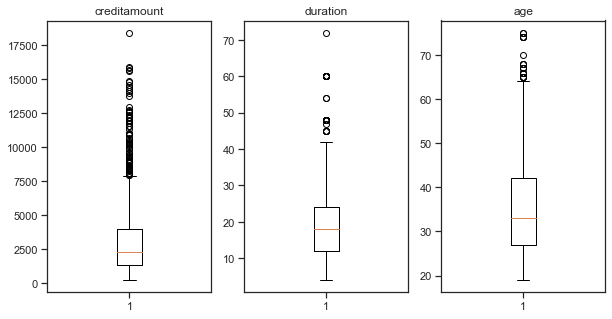

In [16]:
# Boxplots for continuous attributes
# nrows*ncols
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,5))
axes[0].boxplot(credit_card['creditamount'].dropna())
axes[0].set_title('creditamount')
axes[1].boxplot(credit_card['duration'].dropna())
axes[1].set_title('duration')
axes[2].boxplot(credit_card['age'].dropna())
axes[2].set_title('age')

fig.savefig("boxplots.png")

In [17]:
# Binarize the y output for easier use of e.g. ROC curves -> 0 = 'Good' credit; 1 = 'Bad' credit
credit_card["Defaulter_NonDefaulter"].replace([1,2], [0,1], inplace=True)
# Print number of 'good' credits (should be 700) and 'bad credits (should be 300)
credit_card["Defaulter_NonDefaulter"].value_counts()


0    700
1    300
Name: Defaulter_NonDefaulter, dtype: int64

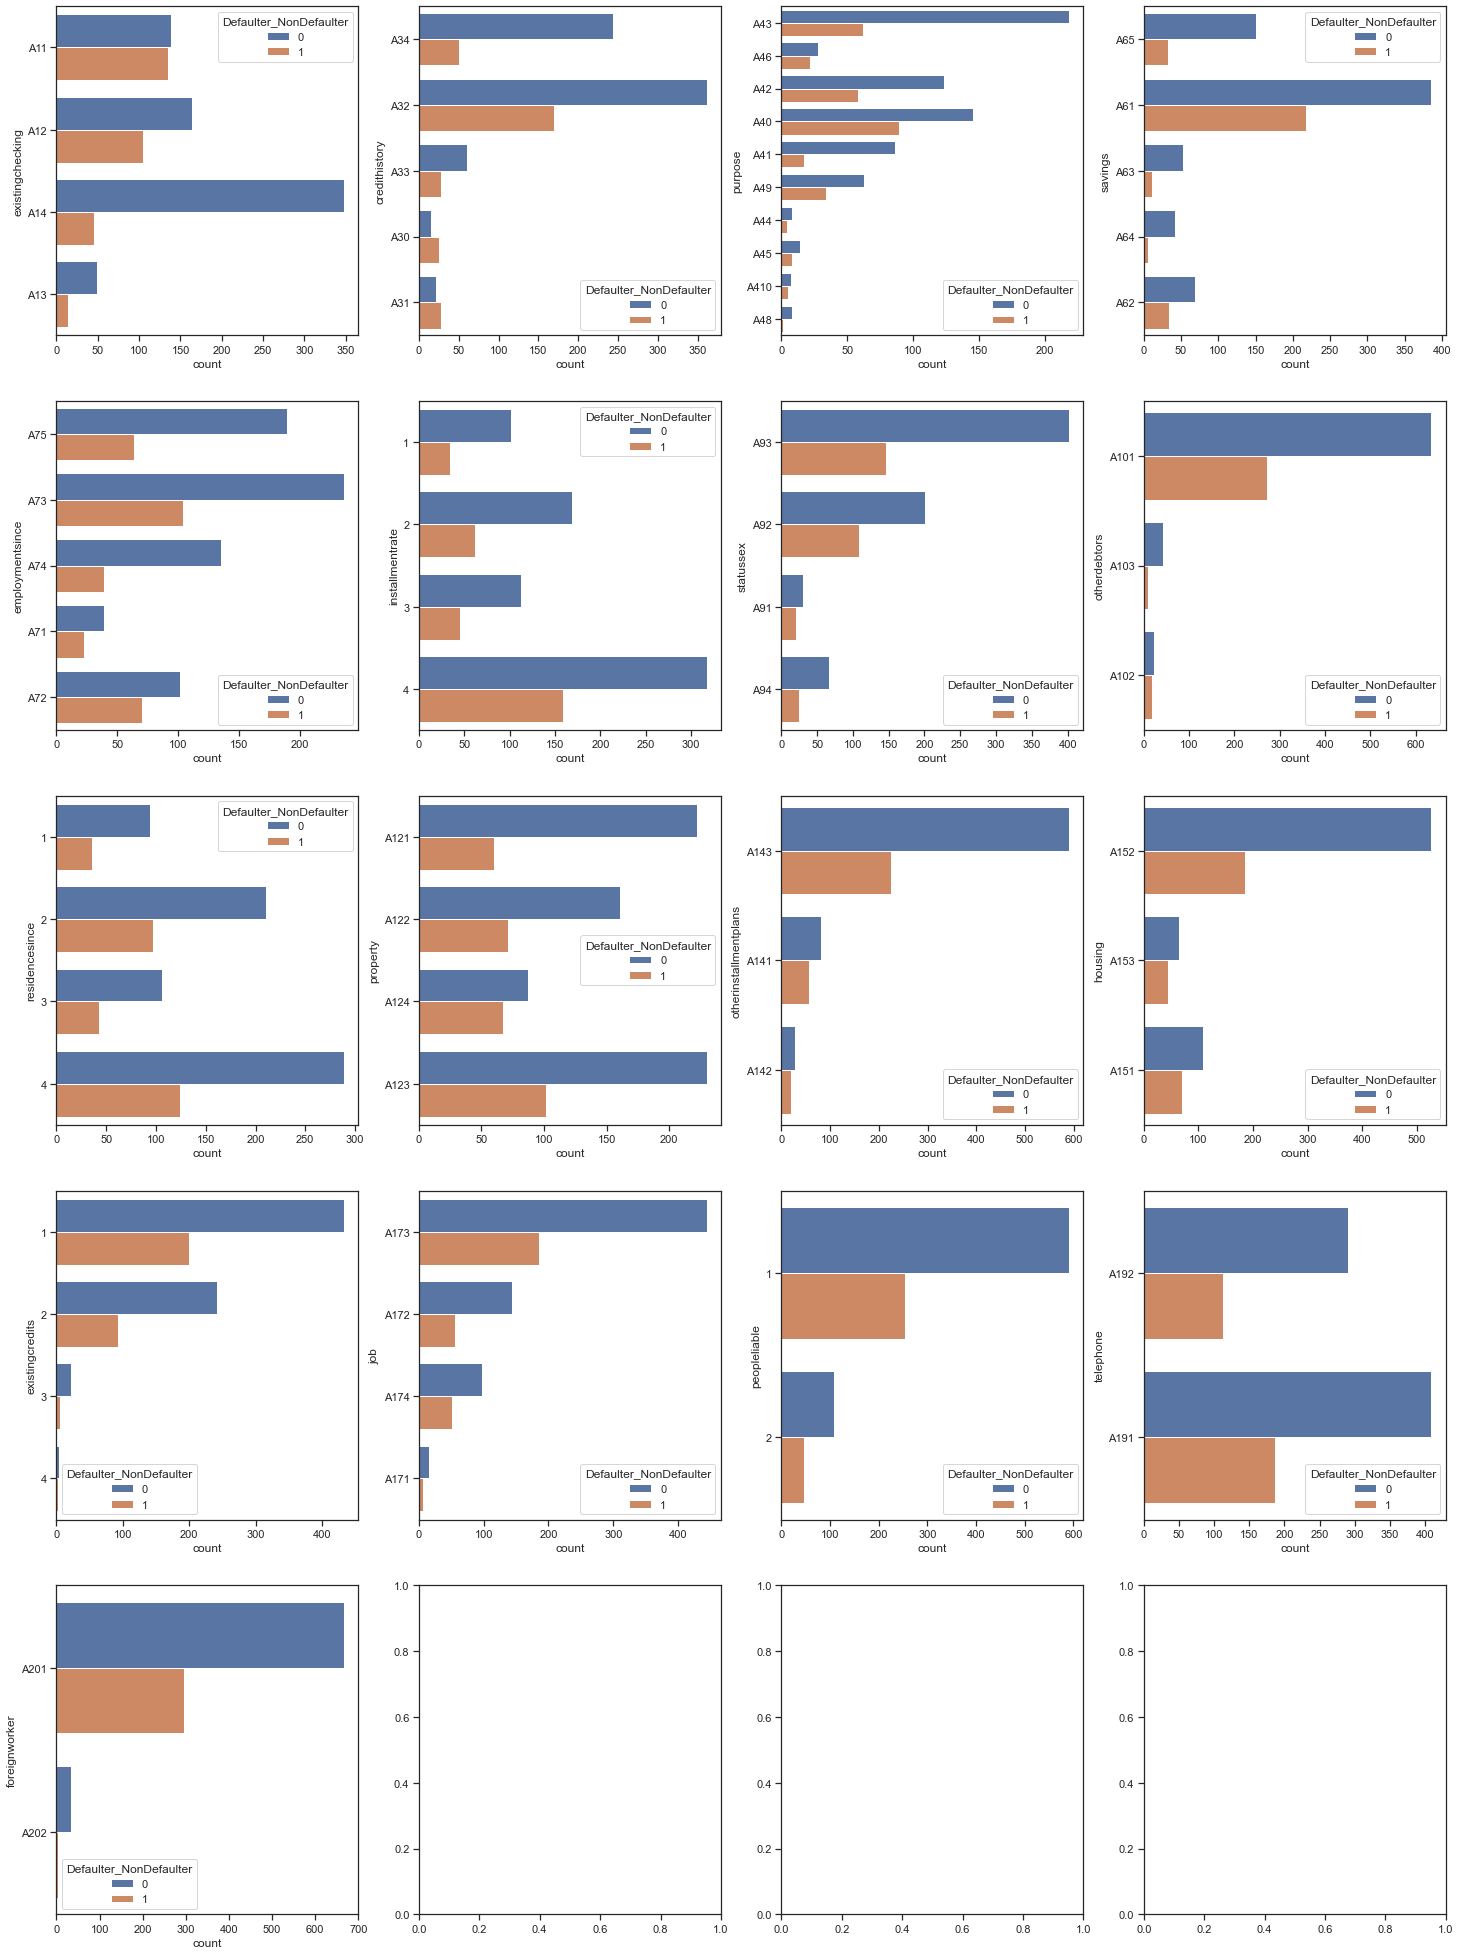

In [18]:
# BarPlot for non-continuous attributes

f, axes = plt.subplots(5, 4,figsize=(8.3*3,11.7*3))
x=0
y=0
for column in credit_card.drop(['Defaulter_NonDefaulter',
                                'creditamount','duration','age'], axis=1):
    
    sns.countplot(y=column, hue="Defaulter_NonDefaulter", 
                  data=credit_card.drop(['creditamount','duration','age'],
                                        axis=1), ax=axes[x,y])
    y+=1
    if y>3:
        x+=1
        y=0
    if x>4:
        break
f.savefig("./barplot.png")

In [19]:
#create quick access list with categorical variables labels

catvars = ['existingchecking', 'credithistory', 'purpose', 'savings', 
           'employmentsince','statussex', 'otherdebtors', 'property', 'otherinstallmentplans', 
           'housing', 'job', 'telephone', 'foreignworker']

#create quickaccess list with numerical variables labels

numvars = ['creditamount', 'duration', 'installmentrate', 'residencesince', 
           'age', 'existingcredits', 'peopleliable']

In [20]:
### Data Transformation

In [21]:
### Seggregating the data into independent and depenedent variables

X = credit_card.drop(["Defaulter_NonDefaulter"],axis = 1)
y = credit_card["Defaulter_NonDefaulter"]

In [22]:
### How to handle the categorical Variable

In [23]:
from IPython.display import Image 
Image("./one_hot_encoding.png")

FileNotFoundError: No such file or directory: './one_hot_encoding.png'

FileNotFoundError: No such file or directory: './one_hot_encoding.png'

<IPython.core.display.Image object>

In [24]:
# One hot encoding
#create dummy variables for every category of every categorical variable
X_dumm = pd.get_dummies(X,columns= catvars,drop_first=True)

In [25]:
X_dumm.columns

Index(['duration', 'creditamount', 'installmentrate', 'residencesince', 'age',
       'existingcredits', 'peopleliable', 'existingchecking_A12',
       'existingchecking_A13', 'existingchecking_A14', 'credithistory_A31',
       'credithistory_A32', 'credithistory_A33', 'credithistory_A34',
       'purpose_A41', 'purpose_A410', 'purpose_A42', 'purpose_A43',
       'purpose_A44', 'purpose_A45', 'purpose_A46', 'purpose_A48',
       'purpose_A49', 'savings_A62', 'savings_A63', 'savings_A64',
       'savings_A65', 'employmentsince_A72', 'employmentsince_A73',
       'employmentsince_A74', 'employmentsince_A75', 'statussex_A92',
       'statussex_A93', 'statussex_A94', 'otherdebtors_A102',
       'otherdebtors_A103', 'property_A122', 'property_A123', 'property_A124',
       'otherinstallmentplans_A142', 'otherinstallmentplans_A143',
       'housing_A152', 'housing_A153', 'job_A172', 'job_A173', 'job_A174',
       'telephone_A192', 'foreignworker_A202'],
      dtype='object')

In [26]:
# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X_dumm, y, test_size=0.20) # 80% training and 20% test

In [27]:
#### How to handle numerical variable

In [28]:
# Standardization
scaler = StandardScaler()

X_train_standardized = scaler.fit_transform(X_train[numvars])
X_test_standardized = scaler.transform(X_test[numvars])

X_train_standardized = pd.DataFrame(X_train_standardized)
X_test_standardized = pd.DataFrame(X_test_standardized)

print("Standardization done")

Standardization done


In [29]:
X_train_standardized.head()

,0,1,2,3,4,5,6
0,-0.903206,-0.753137,-0.853816,0.139562,0.238348,-0.675955,2.357409
1,-0.693375,-0.916840,0.931943,1.039960,-0.736310,-0.675955,-0.424195
2,-0.885400,-0.753137,0.931943,-0.760837,-0.824915,-0.675955,-0.424195
3,-0.104382,0.229082,-0.853816,1.039960,-1.356547,-0.675955,-0.424195
4,-0.696168,-0.262027,0.931943,-0.760837,-0.293284,-0.675955,-0.424195


In [30]:

'''


# MinMax Rescaling to [0,1]
numdata_minmax = MinMaxScaler().fit_transform(credit_card[numvars].drop(['Defaulter_NonDefaulter'], axis=1))

numdata_minmax = pd.DataFrame(numdata_minmax)

'''

"\n\n\n# MinMax Rescaling to [0,1]\nnumdata_minmax = MinMaxScaler().fit_transform(credit_card[numvars].drop(['Defaulter_NonDefaulter'], axis=1))\n\nnumdata_minmax = pd.DataFrame(numdata_minmax)\n\n"

In [31]:
X_train_standardized.columns = numvars
X_test_standardized.columns = numvars

In [32]:
X_train_standardized.head()

,creditamount,duration,installmentrate,residencesince,age,existingcredits,peopleliable
0,-0.903206,-0.753137,-0.853816,0.139562,0.238348,-0.675955,2.357409
1,-0.693375,-0.916840,0.931943,1.039960,-0.736310,-0.675955,-0.424195
2,-0.885400,-0.753137,0.931943,-0.760837,-0.824915,-0.675955,-0.424195
3,-0.104382,0.229082,-0.853816,1.039960,-1.356547,-0.675955,-0.424195
4,-0.696168,-0.262027,0.931943,-0.760837,-0.293284,-0.675955,-0.424195


In [33]:
X_train.head()

,duration,creditamount,installmentrate,residencesince,age,existingcredits,peopleliable,existingchecking_A12,existingchecking_A13,existingchecking_A14,...,property_A124,otherinstallmentplans_A142,otherinstallmentplans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreignworker_A202
316,12,708.0,2,3,38.0,1,2,0,0,0,...,0,0,1,1,0,1,0,0,0,0
505,10,1309.0,4,4,27.0,1,1,0,0,1,...,0,0,1,1,0,1,0,0,0,0
510,12,759.0,4,2,26.0,1,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0
495,24,2996.0,2,4,20.0,1,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0
498,18,1301.0,4,2,32.0,1,1,1,0,0,...,0,0,1,1,0,1,0,0,0,0


In [34]:
X_train_cat = X_train.drop(numvars,axis = 1)
X_test_cat = X_test.drop(numvars,axis = 1)

X_train_cat.reset_index(inplace=True,drop=True)
X_test_cat.reset_index(inplace=True,drop=True)

In [35]:
y_train.reset_index(inplace=True,drop=True)
y_test.reset_index(inplace=True,drop=True)

In [36]:
type(y_train)

pandas.core.series.Series

In [37]:
### Concating the  Transformed Variables

In [38]:
# Concatenating the transformed varaible and createting a datset with transformed varaible

X_train_transformed = pd.concat([X_train_standardized,X_train_cat], axis = 1)

X_test_tarnsformed = pd.concat([X_test_standardized,X_test_cat], axis = 1)

print(X_train_transformed.shape)

print(X_test_tarnsformed.shape)

(800, 48)
(200, 48)


In [39]:
y_train.value_counts()

0    562
1    238
Name: Defaulter_NonDefaulter, dtype: int64

In [40]:
# Oversampling
# http://contrib.scikit-learn.org/imbalanced-learn/auto_examples/combine/plot_smote_enn.html#sphx-glr-auto-examples-combine-plot-smote-enn-py

# Apply SMOTE
sm = SMOTE(k_neighbors = 5,sampling_strategy=0.7)
X_train_transformed_smot, y_train_smot = sm.fit_sample(X_train_transformed, 
                                                       y_train)

In [41]:
pd.Series(y_train_smot).value_counts()

0    562
1    393
Name: Defaulter_NonDefaulter, dtype: int64

In [42]:
X_train_transformed_smot.head()

,creditamount,duration,installmentrate,residencesince,age,existingcredits,peopleliable,existingchecking_A12,existingchecking_A13,existingchecking_A14,...,property_A124,otherinstallmentplans_A142,otherinstallmentplans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreignworker_A202
0,-0.903206,-0.753137,-0.853816,0.139562,0.238348,-0.675955,2.357409,0,0,0,...,0,0,1,1,0,1,0,0,0,0
1,-0.693375,-0.916840,0.931943,1.039960,-0.736310,-0.675955,-0.424195,0,0,1,...,0,0,1,1,0,1,0,0,0,0
2,-0.885400,-0.753137,0.931943,-0.760837,-0.824915,-0.675955,-0.424195,0,0,0,...,0,0,1,1,0,0,1,0,0,0
3,-0.104382,0.229082,-0.853816,1.039960,-1.356547,-0.675955,-0.424195,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4,-0.696168,-0.262027,0.931943,-0.760837,-0.293284,-0.675955,-0.424195,1,0,0,...,0,0,1,1,0,1,0,0,0,0


In [43]:
pd.__version__

'1.0.3'

In [44]:
X_train_transformed_smot = pd.DataFrame(X_train_transformed_smot)

In [45]:
X_train_transformed_smot.columns = X_train_transformed.columns

In [46]:
y_train_smot = pd.Series(y_train_smot)

In [47]:
y_train_smot.value_counts()

0    562
1    393
Name: Defaulter_NonDefaulter, dtype: int64

In [48]:
### Function to get evalaution metrics

In [49]:
# Function for evaluation reports
def get_eval(clf, X_train, y_train,y_test,y_pred):
    # Cross Validation to test and anticipate overfitting problem
    scores1 = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    scores2 = cross_val_score(clf, X_train, y_train, cv=10, scoring='precision')
    scores3 = cross_val_score(clf, X_train, y_train, cv=10, scoring='roc_auc')
    # The mean score and standard deviation of the score estimate
    print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std()))
    print("Cross Validation Precision: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std()))
    print("Cross Validation roc_auc: %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std()))
    # Create and print confusion matrix
    abclf_cm = confusion_matrix(y_test,y_pred)
    print(abclf_cm)
    return

In [50]:
### Function to get RoC Curve

In [51]:
# Function to get roc curve
def get_roc (y_test,y_pred):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    #Plot of a ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return

In [52]:
### Decision Tree Classifier

In [53]:
# fit, train and cross validate Decision Tree with training and test data 
def dectreeclf(X_train, y_train,X_test, y_test):
    start = time.time()

    print("DecisionTreeClassifier")
    dec_tree = tree.DecisionTreeClassifier(min_samples_split=10,min_samples_leaf=5).fit(X_train, y_train)

    # Predict target variables y for test data
    y_pred = dec_tree.predict(X_test)

    # Export visualization as file
    #visualize_tree(dec_tree,X_train,y_train)
    
    # Get Cross Validation and Confusion matrix
    get_eval(dec_tree, X_train, y_train,y_test,y_pred)
        
    end = time.time()
    training_time = end-start
    print("Time taken: ", training_time)
    return

# Visualize tree and save as .pdf
# Only works for dataframes, not for numpy arrays

In [54]:
# Random Forest Classifier

In [55]:
# fit, train and cross validate Decision Tree with training and test data 
def randomforestclf(X_train, y_train,X_test, y_test):
    print("RandomForestClassifier")
    randomforest = RandomForestClassifier().fit(X_train, y_train)

    # Predict target variables y for test data
    y_pred = randomforest.predict(X_test)

    # Get Cross Validation and Confusion matrix
    get_eval(randomforest, X_train, y_train,y_test,y_pred)
    return

In [56]:
### Logistic regression

In [57]:
# fit, train and cross validate Decision Tree with training and test data 
def logregclf(X_train, y_train,X_test, y_test):
    print("LogisticRegression")
    logreg = LogisticRegression().fit(X_train, y_train)

    # Predict target variables y for test data
    y_pred = logreg.predict(X_test)

    # Get Cross Validation and Confusion matrix
    get_eval(logreg, X_train, y_train,y_test,y_pred)
    return

In [58]:
### K Neighbors Classifier

In [59]:
def knnclf(X_train, y_train, X_test, y_test):  
    print("KNeighborsClassifier")
    knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

    # Predict target variables y for test data
    y_pred = knn.predict(X_test)

    # Get Cross Validation and Confusion matrix
    get_eval(knn, X_train, y_train,y_test,y_pred)
    return

In [60]:
# Decisiontree
# Train, test and evaluate the classifiers with different preprocessed data
print("clean resampled")
dectreeclf(X_train_transformed_smot, y_train_smot,X_test_tarnsformed,y_test)

clean resampled
DecisionTreeClassifier
Cross Validation Accuracy: 0.71 (+/- 0.07)
Cross Validation Precision: 0.64 (+/- 0.09)
Cross Validation roc_auc: 0.76 (+/- 0.09)
[[110  28]
 [ 33  29]]
Time taken:  0.5010991096496582


In [61]:
# Logistic Regression
print("clean resampled")
logregclf(X_train_transformed_smot, y_train_smot,X_test_tarnsformed,y_test)

clean resampled
LogisticRegression
Cross Validation Accuracy: 0.79 (+/- 0.09)
Cross Validation Precision: 0.76 (+/- 0.08)
Cross Validation roc_auc: 0.88 (+/- 0.09)
[[118  20]
 [ 34  28]]


In [62]:
# KNN Classifier
print("clean resampled")
knnclf(X_train_transformed_smot, y_train_smot,X_test_tarnsformed,y_test)

clean resampled
KNeighborsClassifier
Cross Validation Accuracy: 0.77 (+/- 0.06)
Cross Validation Precision: 0.68 (+/- 0.05)
Cross Validation roc_auc: 0.85 (+/- 0.08)
[[103  35]
 [ 34  28]]


In [63]:
# Random Forest classifier
print("clean resampled")
randomforestclf(X_train_transformed_smot, y_train_smot,X_test_tarnsformed,y_test)

clean resampled
RandomForestClassifier
Cross Validation Accuracy: 0.81 (+/- 0.08)
Cross Validation Precision: 0.80 (+/- 0.06)
Cross Validation roc_auc: 0.89 (+/- 0.08)
[[126  12]
 [ 37  25]]


In [64]:
# Recursive feature elimination (RFE)
# Use clean data, as logistic regression should be robust do different feature scales
rfe = RFE(LogisticRegression(), 10)
fit = rfe.fit(X_train_transformed_smot, y_train_smot)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 10
Selected Features: [False False False False False False False False  True  True False  True
  True  True  True False False False False False False  True False False
 False  True False False False False False False False False False  True
 False False False False False False False False False False False  True]
Feature Ranking: [24 15 22 33 32 38 34  2  1  1 37  1  1  1  1 10  5  4 16 18 39  1  9 26
 25  1  3 21 20 13 19  8  6  7 17  1 36 31 35 27 12 11 14 30 29 28 23  1]


In [65]:

# Apply fitted transformation to datasets
RFEX_train = rfe.transform(X_train_transformed_smot)
RFEX_test = rfe.transform(X_test_tarnsformed)
RFEy_train = y_train_smot
RFEy_test = y_test

In [66]:
RFEX_train[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 1., 0.])

In [67]:
imp_cols = fit.ranking_

In [68]:
imp_cols

array([24, 15, 22, 33, 32, 38, 34,  2,  1,  1, 37,  1,  1,  1,  1, 10,  5,
        4, 16, 18, 39,  1,  9, 26, 25,  1,  3, 21, 20, 13, 19,  8,  6,  7,
       17,  1, 36, 31, 35, 27, 12, 11, 14, 30, 29, 28, 23,  1])

In [69]:
imp_cols = list(imp_cols)

In [70]:
imp_var_ind = []
for i in range(len(imp_cols)):
    if imp_cols[i] == 1:
        imp_var_ind.append(i) 

In [71]:
imp_var_ind

[8, 9, 11, 12, 13, 14, 21, 25, 35, 47]

In [72]:
var_list = X_train_transformed_smot.columns.to_list()

In [73]:
var_name = []
for i in imp_var_ind:
    var_name.append(var_list[i])
    
var_name

['existingchecking_A13',
 'existingchecking_A14',
 'credithistory_A32',
 'credithistory_A33',
 'credithistory_A34',
 'purpose_A41',
 'purpose_A48',
 'savings_A64',
 'otherdebtors_A103',
 'foreignworker_A202']